# EDA for 2020 Survey Data

In [1]:
# Import required modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

# Settings
sns.set()
warnings.filterwarnings('ignore')

# Global params
title_fd = {'fontsize': 15, 'fontweight': 'bold'}

## Import Data

In [2]:
# Load data
df = pd.read_csv('kaggle_survey_2020_responses.csv')

# Extract definitions
qns = df.loc[0, :].copy().T
df = df.loc[1:, :]

## Helper Functions

In [3]:
# Plot bar
def plot_bar(col, title, sortorder=None, horizontal=True):
    if sortorder:
        data = df[col].value_counts(normalize=True).loc[sortorder]
    else:
        data = df[col].value_counts(normalize=True).sort_values(ascending=False)
    if horizontal:
        data.plot.barh()
        plt.gca().invert_yaxis()
    else:
        data.plot.bar()
    plt.title(title, fontdict=title_fd)
    plt.show()

# Plot multiple select
def plot_multi(qn, title, names, nonecol, dropnone=True, horizontal=True):
    cols = qns.index[qns.index.str.contains(qn)]
    
    # Breakdown
    temp_data = df[cols].copy()
    temp_data.loc[temp_data.notnull().sum(axis=1) == 0, f'{qn}_Part_{nonecol}'] = 'None'
    if dropnone:
        temp_data = temp_data.drop(f'{qn}_Part_{nonecol}', axis=1)
        final_names = names[:-2] + [names[-1]]
    else:
        final_names = names
    data = temp_data.notnull().sum()
    data.index = final_names
    data.sort_values(ascending=False).plot.barh()
    plt.gca().invert_yaxis()
    plt.title(title, fontdict=title_fd)
    plt.show()

    # Number of selections
    temp_data = df[cols].copy()
    if nonecol:
        temp_data = temp_data.drop(f'{qn}_Part_{nonecol}', axis=1)
    data = pd.Series(temp_data.notnull().sum(axis=1)).value_counts().sort_index()
    # data = data.drop(0)
    data.plot.bar()
    plt.title(f'No. of {title}', fontdict=title_fd)
    plt.show()

## Data Exploration

In [4]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Personal Info

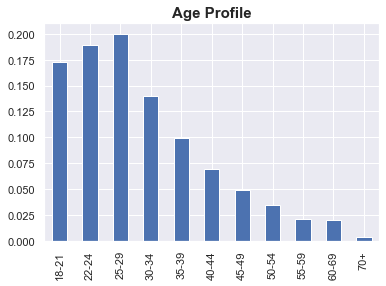

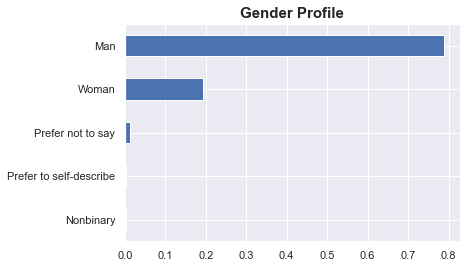

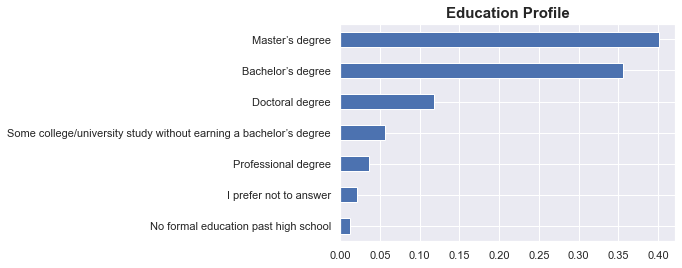

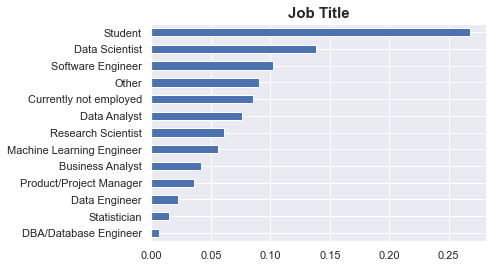

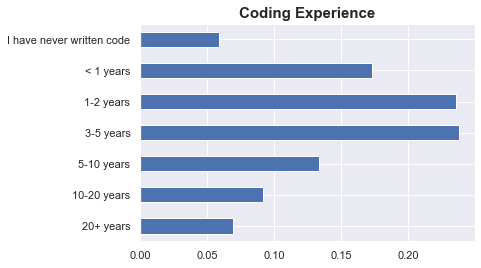

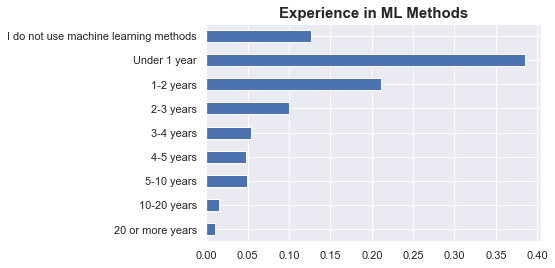

In [10]:
sortorder = ['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70+']
plot_bar('Q1', 'Age Profile', sortorder, False)
plot_bar('Q2', 'Gender Profile')
plot_bar('Q4', 'Education Profile')
plot_bar('Q5', 'Job Title')
plot_bar('Q6', 'Coding Experience', sortorder=['I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years'])
sortorder_q15 = [
    'I do not use machine learning methods', 'Under 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-10 years', '10-20 years', '20 or more years'
]
plot_bar('Q15', 'Experience in ML Methods', sortorder=sortorder_q15)

## Company Details

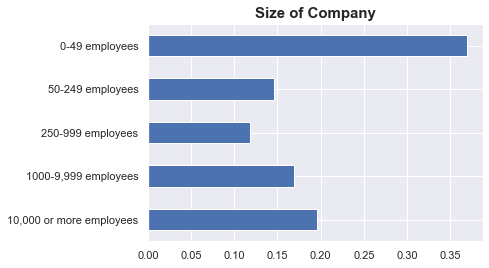

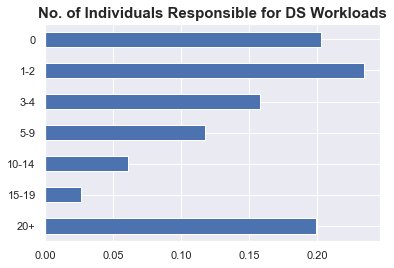

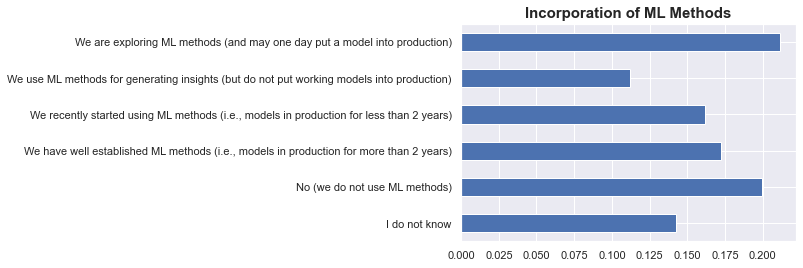

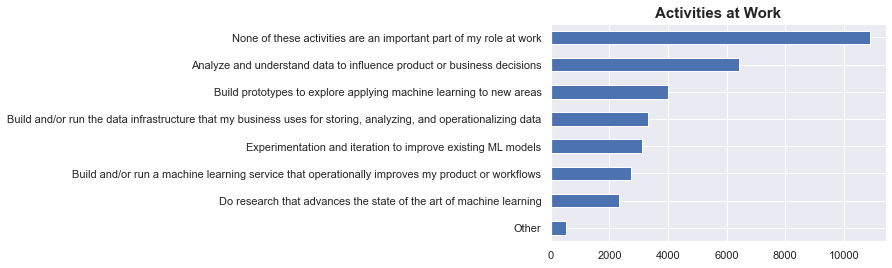

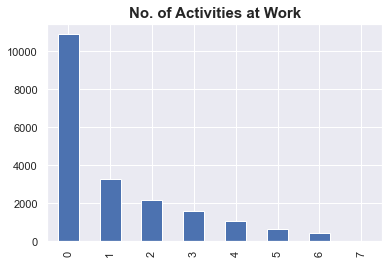

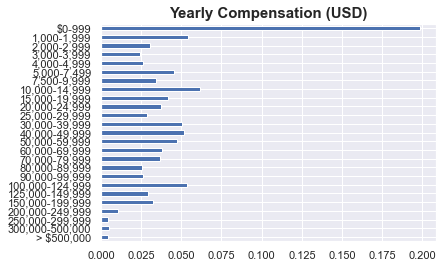

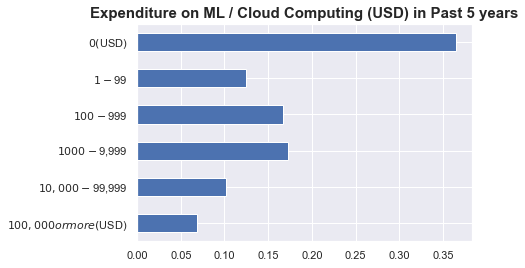

In [6]:
sortorder_q20 = [
    '0-49 employees', '50-249 employees', '250-999 employees',
    '1000-9,999 employees', '10,000 or more employees'
]
plot_bar('Q20', 'Size of Company', sortorder=sortorder_q20)

sortorder_q21 = [
    '0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+'
]
plot_bar('Q21', 'No. of Individuals Responsible for DS Workloads', sortorder=sortorder_q21)

sortorder_q22 = [
    'We are exploring ML methods (and may one day put a model into production)',
    'We use ML methods for generating insights (but do not put working models into production)',
    'We recently started using ML methods (i.e., models in production for less than 2 years)',
    'We have well established ML methods (i.e., models in production for more than 2 years)',
    'No (we do not use ML methods)',
    'I do not know'
]
plot_bar('Q22', 'Incorporation of ML Methods', sortorder=sortorder_q22)

names_q23 = [
    'Analyze and understand data to influence product or business decisions',
    'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data',
    'Build prototypes to explore applying machine learning to new areas',
    'Build and/or run a machine learning service that operationally improves my product or workflows',
    'Experimentation and iteration to improve existing ML models',
    'Do research that advances the state of the art of machine learning',
    'None of these activities are an important part of my role at work',
    'Other'
]
plot_multi('Q23', 'Activities at Work', names_q23, 7, False, True)

sortorder_q24 = [
    '$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999',
    '5,000-7,499', '7,500-9,999', '10,000-14,999', '15,000-19,999',
    '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999',
    '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999',
    '90,000-99,999', '100,000-124,999', '125,000-149,999', '150,000-199,999',
    '200,000-249,999', '250,000-299,999', '300,000-500,000', '> $500,000'
]
plot_bar('Q24', 'Yearly Compensation (USD)', sortorder=sortorder_q24)

sortorder_q25 = [
    '$0 ($USD)', '$1-$99', '$100-$999', '$1000-$9,999', '$10,000-$99,999', '$100,000 or more ($USD)'
]
plot_bar('Q25', 'Expenditure on ML / Cloud Computing (USD) in Past 5 years', sortorder=sortorder_q25)

## Programming Languages

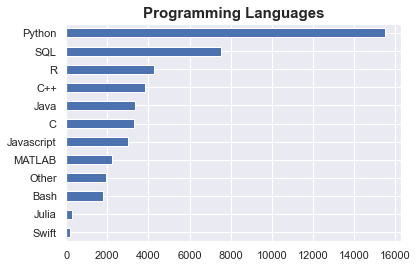

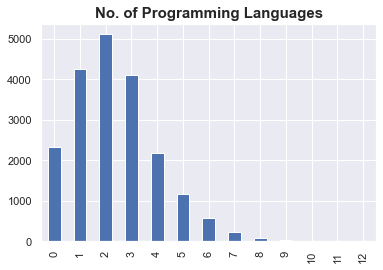

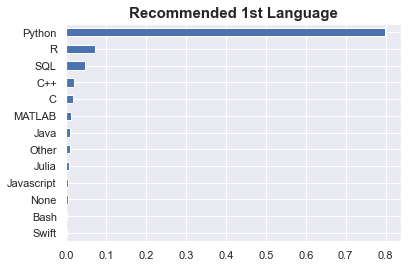

In [8]:
names = [
    'Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift', 'Bash', 'MATLAB',
    'None',
    'Other'
]

plot_multi('Q7', 'Programming Languages', names, len(names)-1)

plot_bar('Q8', 'Recommended 1st Language')

## Programming IDEs

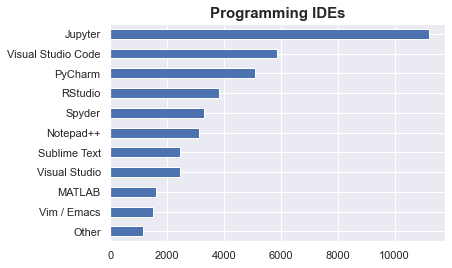

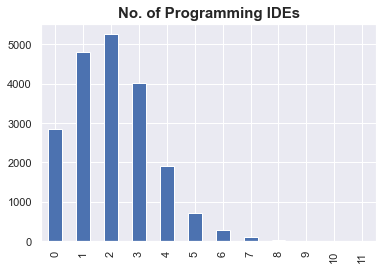

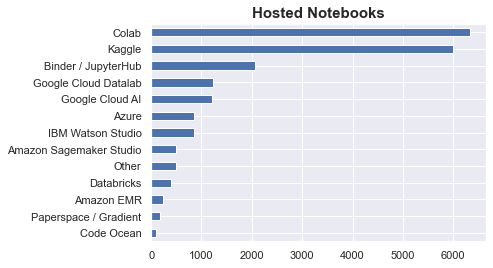

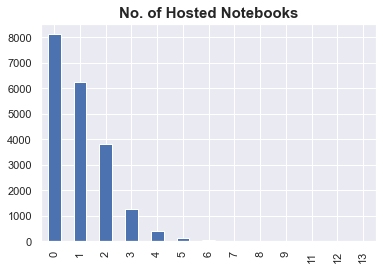

In [9]:
names_q9 = [
    'Jupyter', 'RStudio', 'Visual Studio', 'Visual Studio Code', 'PyCharm', 'Spyder', 'Notepad++', 'Sublime Text',
    'Vim / Emacs', 'MATLAB',
    'None',
    'Other'
]
plot_multi('Q9', 'Programming IDEs', names_q9, 11)

names_q10 = [
    'Kaggle', 'Colab', 'Azure', 'Paperspace / Gradient', 'Binder / JupyterHub', 'Code Ocean', 'IBM Watson Studio',
    'Amazon Sagemaker Studio', 'Amazon EMR', 'Google Cloud AI', 'Google Cloud Datalab', 'Databricks',
    'None',
    'Other'
]
plot_multi('Q10', 'Hosted Notebooks', names_q10, 13)

## Data Visualisation Libraries

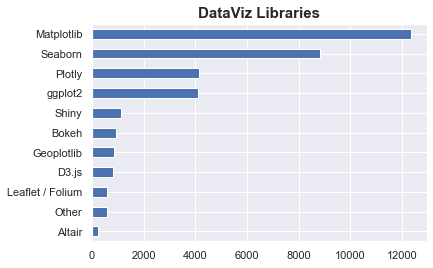

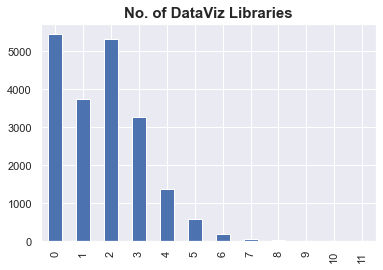

In [12]:
names_q14 = [
    'Matplotlib', 'Seaborn', 'Plotly', 'ggplot2', 'Shiny', 'D3.js',
    'Altair', 'Bokeh', 'Geoplotlib', 'Leaflet / Folium', 'None', 'Other'
]
plot_multi('Q14', 'DataViz Libraries', names_q14, 11)

## ML Frameworks

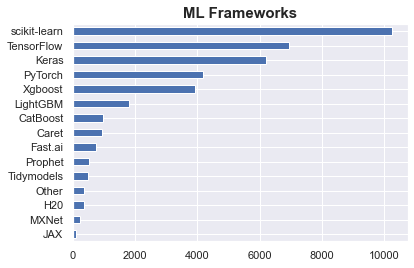

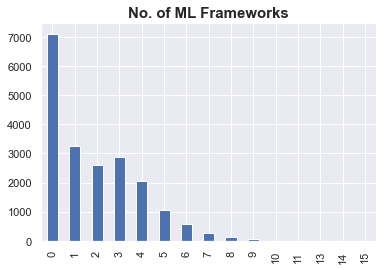

In [14]:
names_q16 = [
    'scikit-learn', 'TensorFlow', 'Keras', 'PyTorch', 'Fast.ai',
    'MXNet', 'Xgboost', 'LightGBM', 'CatBoost', 'Prophet', 'H20', 'Caret',
    'Tidymodels', 'JAX', 'None', 'Other'
]
plot_multi('Q16', 'ML Frameworks', names_q16, 15)

## Big Data Products

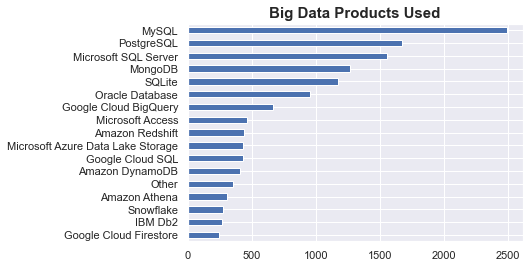

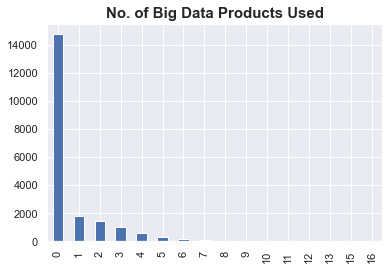

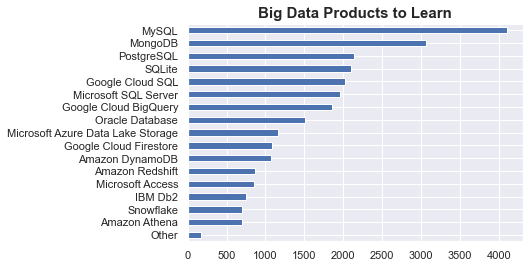

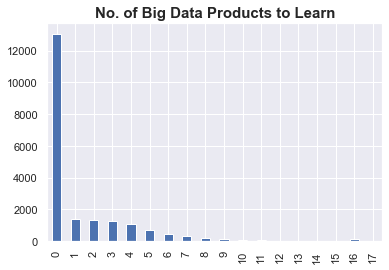

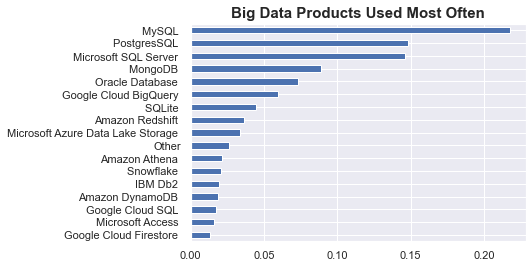

In [11]:
names_q29a = [
    'MySQL', 'PostgreSQL', 'SQLite', 'Oracle Database', 'MongoDB',
    'Snowflake', 'IBM Db2', 'Microsoft SQL Server', 'Microsoft Access',
    'Microsoft Azure Data Lake Storage', 'Amazon Redshift', 'Amazon Athena',
    'Amazon DynamoDB', 'Google Cloud BigQuery', 'Google Cloud SQL', 'Google Cloud Firestore',
    'None', 'Other'
]
plot_multi('Q29_A', 'Big Data Products Used', names_q29a, 17)
plot_multi('Q29_B', 'Big Data Products to Learn', names_q29a, 17)
plot_bar('Q30', 'Big Data Products Used Most Often')

## Automated ML Tools

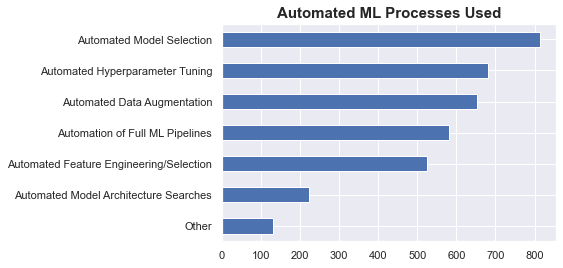

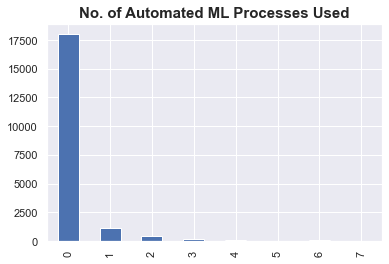

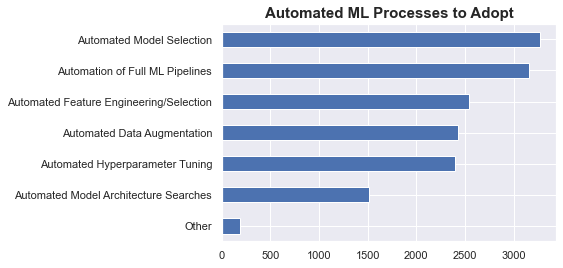

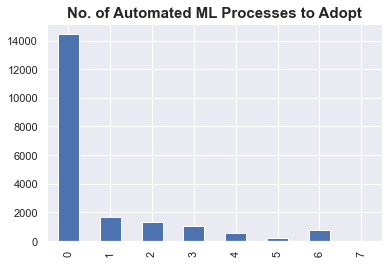

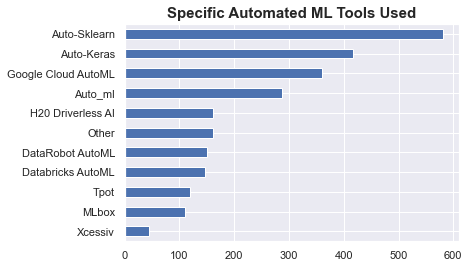

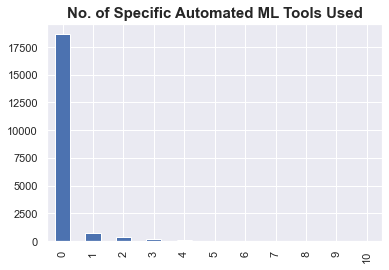

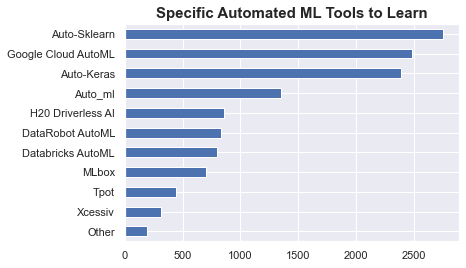

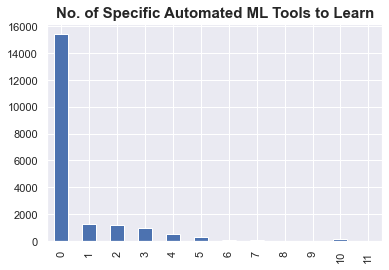

In [13]:
names_q33a = [
    'Automated Data Augmentation', 'Automated Feature Engineering/Selection',
    'Automated Model Selection', 'Automated Model Architecture Searches',
    'Automated Hyperparameter Tuning', 'Automation of Full ML Pipelines', 'No / None',
    'Other'
]
plot_multi('Q33_A', 'Automated ML Processes Used', names_q33a, 7)
plot_multi('Q33_B', 'Automated ML Processes to Adopt', names_q33a, 7)

names_q34a = [
    'Google Cloud AutoML', 'H20 Driverless AI', 'Databricks AutoML',
    'DataRobot AutoML', 'Tpot', 'Auto-Keras', 'Auto-Sklearn', 'Auto_ml',
    'Xcessiv', 'MLbox', 'No / None', 'Other'
]
plot_multi('Q34_A', 'Specific Automated ML Tools Used', names_q34a, 11)
plot_multi('Q34_B', 'Specific Automated ML Tools to Learn', names_q34a, 11)

## ML Management Tools

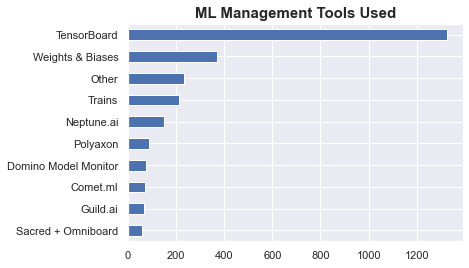

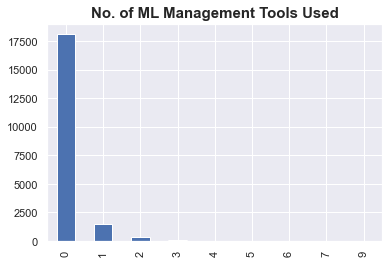

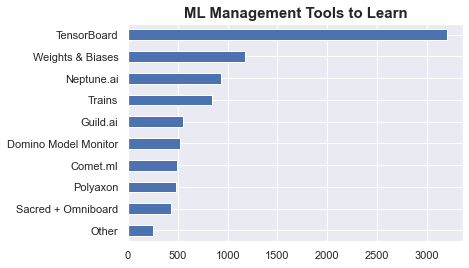

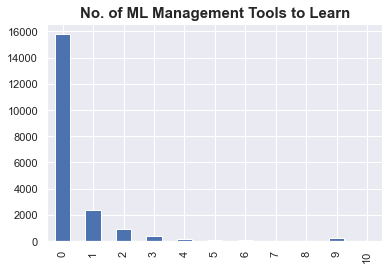

In [33]:
names_q35a = [
    'Neptune.ai', 'Weights & Biases', 'Comet.ml', 'Sacred + Omniboard',
    'TensorBoard', 'Guild.ai', 'Polyaxon', 'Trains',
    'Domino Model Monitor', 'No / None', 'Other'
]
plot_multi('Q35_A', 'ML Management Tools Used', names_q35a, 10)
plot_multi('Q35_B', 'ML Management Tools to Learn', names_q35a, 10)

## Code-Sharing Platforms

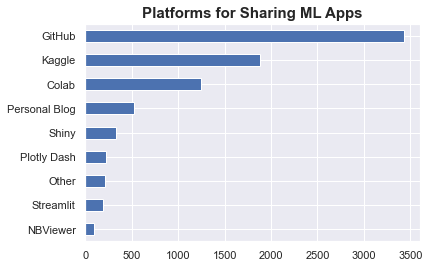

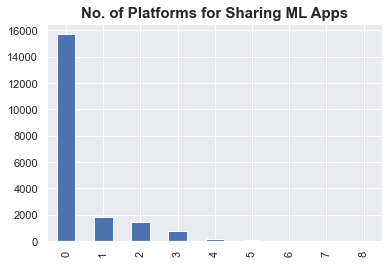

In [34]:
names_q36 = [
    'Plotly Dash', 'Streamlit', 'NBViewer', 'GitHub', 'Personal Blog',
    'Kaggle', 'Colab', 'Shiny', "None / Don't Share Publicly", 'Other'
]
plot_multi('Q36', 'Platforms for Sharing ML Apps', names_q36, 9)

## Others

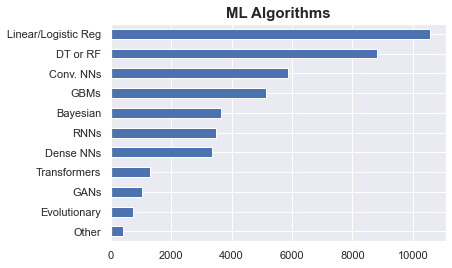

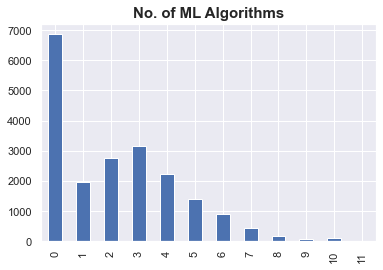

In [15]:
names_q17 = [
    'Linear/Logistic Reg', 'DT or RF', 'GBMs', 'Bayesian', 'Evolutionary',
    'Dense NNs', 'Conv. NNs', 'GANs', 'RNNs', 'Transformers', 'None', 'Other'
]
plot_multi('Q17', 'ML Algorithms', names_q17, 11)

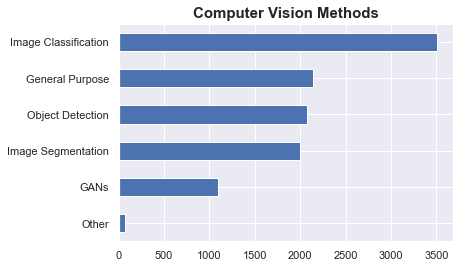

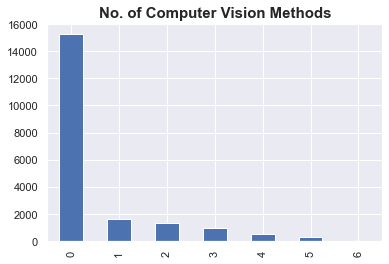

In [16]:
names_q18 = [
    'General Purpose', 'Image Segmentation', 'Object Detection',
    'Image Classification', 'GANs', 'None', 'Other'
]
plot_multi('Q18', 'Computer Vision Methods', names_q18, 6)

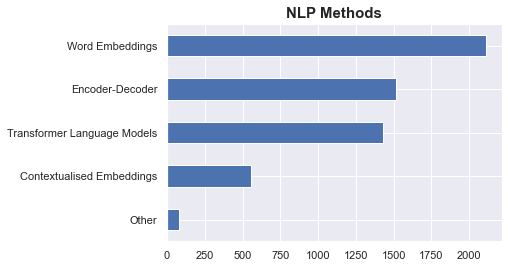

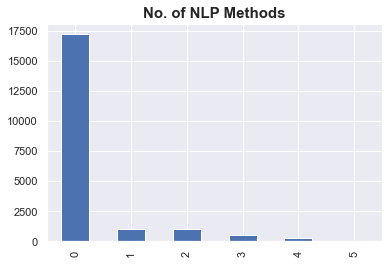

In [17]:
names_q19 = [
    'Word Embeddings', 'Encoder-Decoder', 'Contextualised Embeddings',
    'Transformer Language Models', 'None', 'Other'
]
plot_multi('Q19', 'NLP Methods', names_q19, 5)

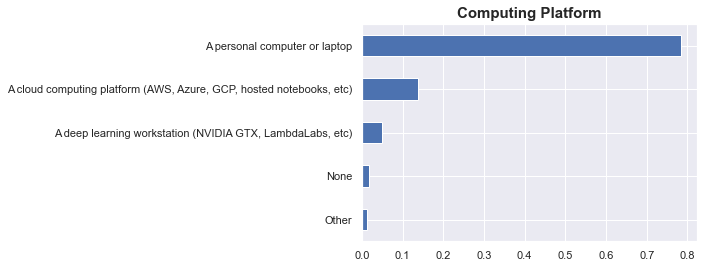

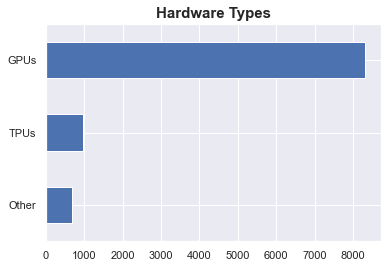

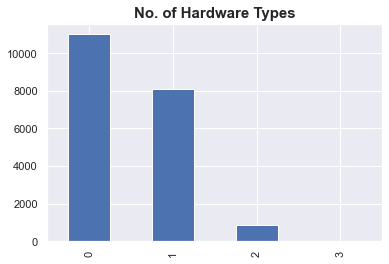

In [11]:
plot_bar('Q11', 'Computing Platform')
plot_multi('Q12', 'Hardware Types', ['GPUs', 'TPUs', 'None', 'Other'], 3)

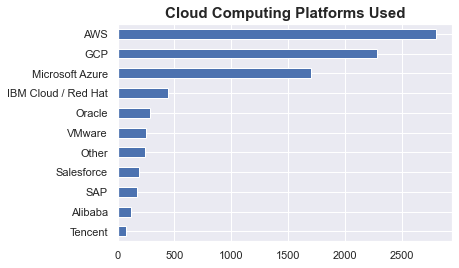

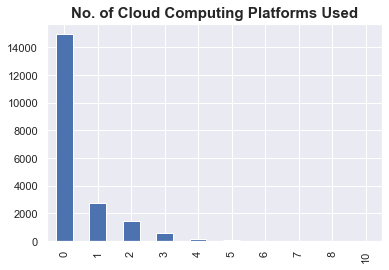

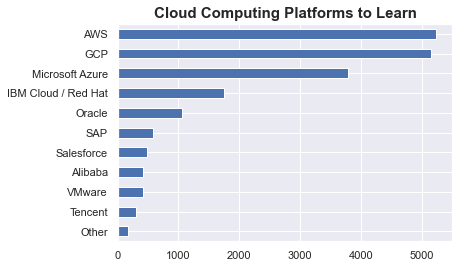

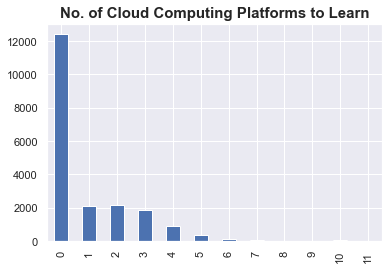

In [24]:
names_q26a = [
    'AWS', 'Microsoft Azure', 'GCP', 'IBM Cloud / Red Hat',
    'Oracle', 'SAP', 'Salesforce', 'VMware', 'Alibaba', 'Tencent', 'None', 'Other'
]
plot_multi('Q26_A', 'Cloud Computing Platforms Used', names_q26a, 11)
plot_multi('Q26_B', 'Cloud Computing Platforms to Learn', names_q26a, 11)

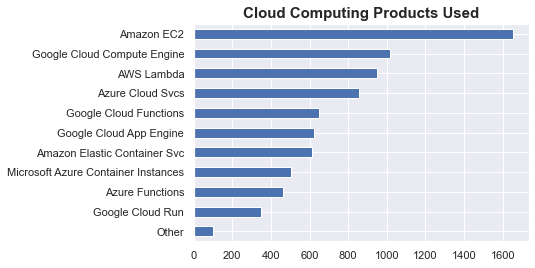

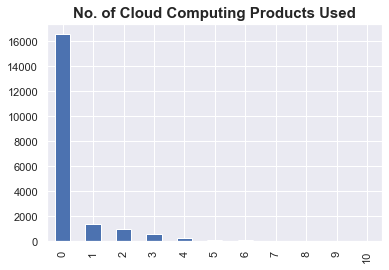

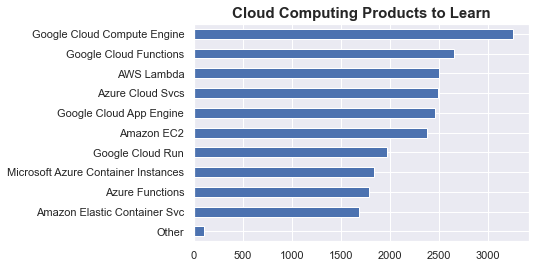

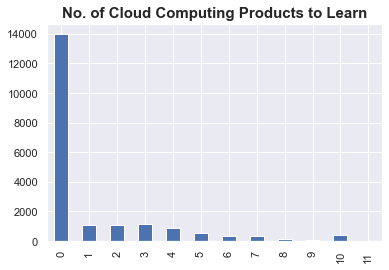

In [25]:
names_q27a = [
    'Amazon EC2', 'AWS Lambda', 'Amazon Elastic Container Svc',
    'Azure Cloud Svcs', 'Microsoft Azure Container Instances',
    'Azure Functions', 'Google Cloud Compute Engine', 'Google Cloud Functions',
    'Google Cloud Run', 'Google Cloud App Engine', 'No / None', 'Other'
]
plot_multi('Q27_A', 'Cloud Computing Products Used', names_q27a, 11)
plot_multi('Q27_B', 'Cloud Computing Products to Learn', names_q27a, 11)

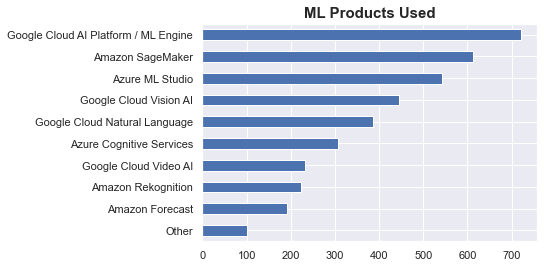

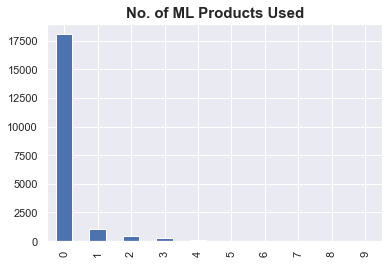

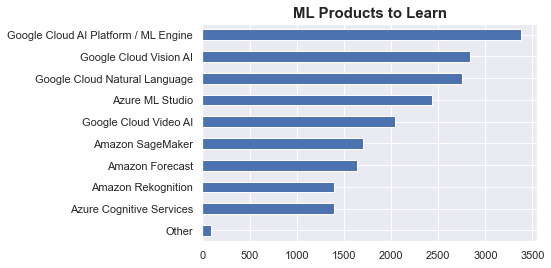

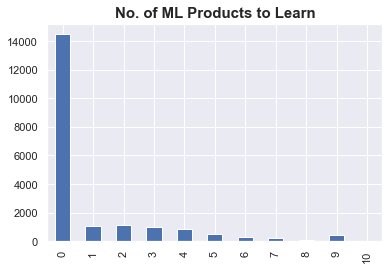

In [26]:
names_q28a = [
    'Amazon SageMaker', 'Amazon Forecast', 'Amazon Rekognition',
    'Azure ML Studio', 'Azure Cognitive Services',
    'Google Cloud AI Platform / ML Engine', 'Google Cloud Video AI',
    'Google Cloud Natural Language', 'Google Cloud Vision AI',
    'No / None', 'Other'
]
plot_multi('Q28_A', 'ML Products Used', names_q28a, 10)
plot_multi('Q28_B', 'ML Products to Learn', names_q28a, 10)

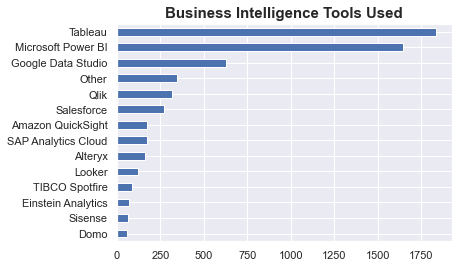

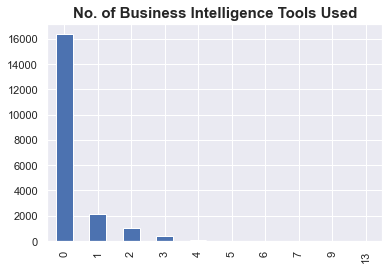

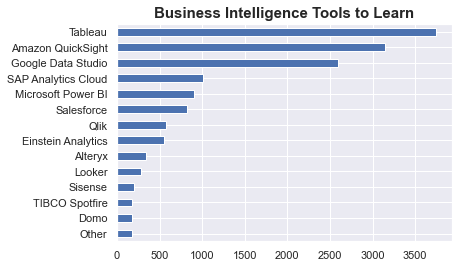

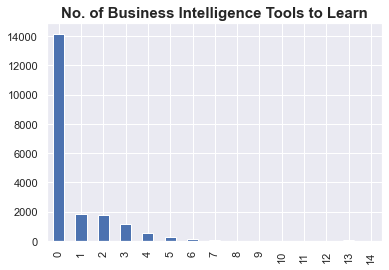

In [29]:
names_q31a = [
    'Amazon QuickSight', 'Microsoft Power BI', 'Google Data Studio',
    'Looker', 'Tableau', 'Salesforce', 'Einstein Analytics', 'Qlik',
    'Domo', 'TIBCO Spotfire', 'Alteryx', 'Sisense', 'SAP Analytics Cloud',
    'None', 'Other'
]
plot_multi('Q31_A', 'Business Intelligence Tools Used', names_q31a, 14)
plot_multi('Q31_B', 'Business Intelligence Tools to Learn', names_q31a, 14)

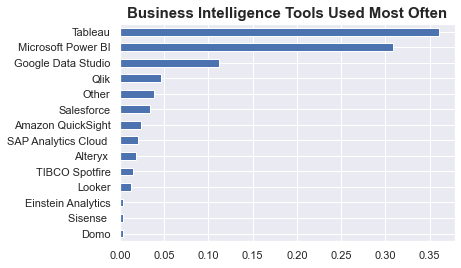

In [30]:
plot_bar('Q32', 'Business Intelligence Tools Used Most Often')

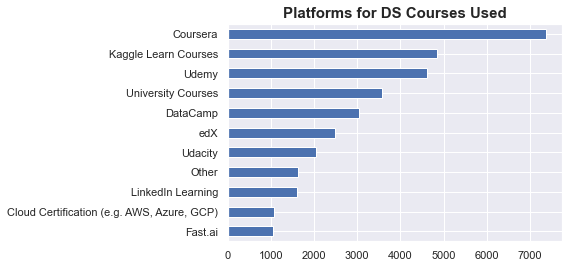

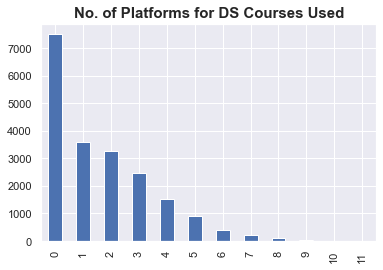

In [35]:
names_q37 = [
    'Coursera', 'edX', 'Kaggle Learn Courses', 'DataCamp', 'Fast.ai',
    'Udacity', 'Udemy', 'LinkedIn Learning', 'Cloud Certification (e.g. AWS, Azure, GCP)',
    'University Courses', 'None', 'Other'
]
plot_multi('Q37', 'Platforms for DS Courses Used', names_q37, 11)

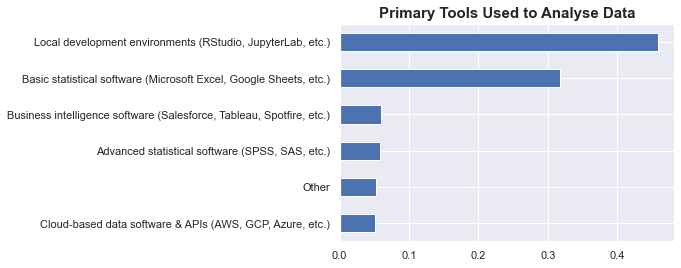

In [36]:
sortorder_q38 = [
    'Local development environments (RStudio, JupyterLab, etc.)',
    'Basic statistical software (Microsoft Excel, Google Sheets, etc.)',
    'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)',
    'Advanced statistical software (SPSS, SAS, etc.)', 'Other',
    'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)'
]
plot_bar('Q38', 'Primary Tools Used to Analyse Data', sortorder_q38, )

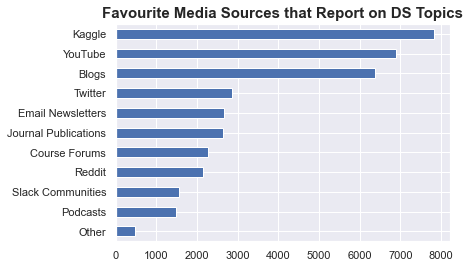

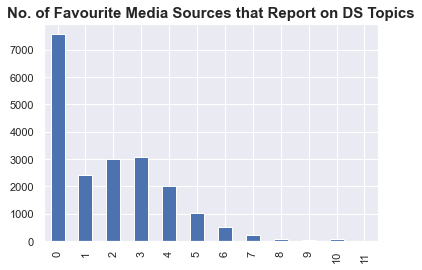

In [37]:
names_q39 = [
    'Twitter', 'Email Newsletters', 'Reddit', 'Kaggle', 'Course Forums',
    'YouTube', 'Podcasts', 'Blogs', 'Journal Publications', 'Slack Communities',
    'None', 'Other'
]
plot_multi('Q39', 'Favourite Media Sources that Report on DS Topics', names_q39, 11)